In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('../../data/df_rfm.csv')

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,TotalSales
0,489434,85048,15CM_CHRISTMAS_GLASS_BALL_20_LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United_Kingdom,83.40
1,489434,22041,"RECORD_FRAME_7""_SINGLE_SIZE",48,2009-12-01 07:45:00,2.10,13085,United_Kingdom,100.80
2,489434,21232,STRAWBERRY_CERAMIC_TRINKET_BOX,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom,30.00
3,489434,22064,PINK_DOUGHNUT_TRINKET_POT,24,2009-12-01 07:45:00,1.65,13085,United_Kingdom,39.60
4,489434,21871,SAVE_THE_PLANET_MUG,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
713597,581587,22613,PACK_OF_20_SPACEBOY_NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
713598,581587,22899,CHILDREN'S_APRON_DOLLY_GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
713599,581587,23254,CHILDRENS_CUTLERY_DOLLY_GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
713600,581587,23255,CHILDRENS_CUTLERY_CIRCUS_PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [181]:
# prend seulement les dates de 2009 et decembre 2010 separer le data frame en deu
df_2009_2010 = df[(df['InvoiceDate'] >= '2009-12-01') & (df['InvoiceDate'] < '2010-12-01')]
df_2011 = df[df['InvoiceDate'] >= '2010-12-01']

In [182]:
df_2009_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337799 entries, 0 to 337798
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      337799 non-null  int64  
 1   StockCode    337799 non-null  int64  
 2   Description  337799 non-null  object 
 3   Quantity     337799 non-null  int64  
 4   InvoiceDate  337799 non-null  object 
 5   Price        337799 non-null  float64
 6   Customer_ID  337799 non-null  int64  
 7   Country      337799 non-null  object 
 8   TotalSales   337799 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 25.8+ MB


In [183]:
df_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,TotalSales
337799,536365,71053,WHITE_METAL_LANTERN,6,2010-12-01 08:26:00,3.39,17850,United_Kingdom,20.34
337800,536365,22752,SET_7_BABUSHKA_NESTING_BOXES,2,2010-12-01 08:26:00,7.65,17850,United_Kingdom,15.30
337801,536365,21730,GLASS_STAR_FROSTED_T-LIGHT_HOLDER,6,2010-12-01 08:26:00,4.25,17850,United_Kingdom,25.50
337802,536366,22633,HAND_WARMER_UNION_JACK,6,2010-12-01 08:28:00,1.85,17850,United_Kingdom,11.10
337803,536366,22632,HAND_WARMER_RED_POLKA_DOT,6,2010-12-01 08:28:00,1.85,17850,United_Kingdom,11.10
...,...,...,...,...,...,...,...,...,...
713597,581587,22613,PACK_OF_20_SPACEBOY_NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
713598,581587,22899,CHILDREN'S_APRON_DOLLY_GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
713599,581587,23254,CHILDRENS_CUTLERY_DOLLY_GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
713600,581587,23255,CHILDRENS_CUTLERY_CIRCUS_PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [184]:
from datetime import timedelta

# Convertir InvoiceDate de l'objet au format datetime
df_2009_2010['InvoiceDate'] = pd.to_datetime(df_2009_2010['InvoiceDate'])

# Obtenir la date maximale
snapshot_date = df_2009_2010['InvoiceDate'].max() + timedelta(days=1)

# Agréger les données (RFM : Récence, Fréquence, Valeur monétaire)
rfm = df_2009_2010.groupby(['Customer_ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Calcul de la récence
    'Invoice': 'count',  # Comptage du nombre de transactions (fréquence)
    'TotalSales': 'sum'  # Somme des ventes (valeur monétaire)
})

# Renommer les colonnes
rfm.rename(columns={'InvoiceDate': 'Recency',
                   'Invoice': 'Frequency',
                   'TotalSales': 'MonetaryValue'}, inplace=True)

# Afficher les premières lignes des données
rfm.head()


/tmp/ipykernel_21393/1040172788.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,MonetaryValue
Customer_ID,,,
12346,156,20,144.02
12347,31,29,445.73
12348,65,19,221.16
12349,34,93,1946.64
12352,2,17,332.40


In [185]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Créer un sous-ensemble de données avec les 3 variables
rfm_rfm = rfm[['Recency', 'Frequency', 'MonetaryValue']]

# Créer une figure avec trois sous-graphiques
fig = make_subplots(rows=3, cols=1, subplot_titles=('Recency', 'Frequency', 'MonetaryValue'))

# Ajouter les graphiques de boîtes à chaque sous-graphique
fig.add_trace(go.Box(y=rfm_rfm['Recency'], name='Recency'), row=1, col=1)
fig.add_trace(go.Box(y=rfm_rfm['Frequency'], name='Frequency'), row=2, col=1)
fig.add_trace(go.Box(y=rfm_rfm['MonetaryValue'], name='MonetaryValue'), row=3, col=1)

# Mettre à jour le titre et les dimensions de la figure
fig.update_layout(title='Distribution des variables RFM',
                  height=800, width=600)

# Afficher la figure interactive dans le notebook
fig.show()

In [186]:
# Define the upper limit for each variable
recency_upper_limit = rfm['Recency'].quantile(0.95)
frequency_upper_limit = rfm['Frequency'].quantile(0.95)
monetary_value_upper_limit = rfm['MonetaryValue'].quantile(0.95)

# Remove the outliers
rfm = rfm[(rfm['Recency'] <= recency_upper_limit) & 
          (rfm['Frequency'] <= frequency_upper_limit) & 
          (rfm['MonetaryValue'] <= monetary_value_upper_limit)]

In [187]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Créer un sous-ensemble de données avec les 3 variables
rfm_rfm = rfm[['Recency', 'Frequency', 'MonetaryValue']]

# Créer une figure avec trois sous-graphiques
fig = make_subplots(rows=3, cols=1, subplot_titles=('Recency', 'Frequency', 'MonetaryValue'))

# Ajouter les graphiques de boîtes à chaque sous-graphique
fig.add_trace(go.Box(y=rfm_rfm['Recency'], name='Recency'), row=1, col=1)
fig.add_trace(go.Box(y=rfm_rfm['Frequency'], name='Frequency'), row=2, col=1)
fig.add_trace(go.Box(y=rfm_rfm['MonetaryValue'], name='MonetaryValue'), row=3, col=1)

# Mettre à jour le titre et les dimensions de la figure
fig.update_layout(title='Distribution des variables RFM',
                  height=800, width=600)

# Afficher la figure interactive dans le notebook
fig.show()

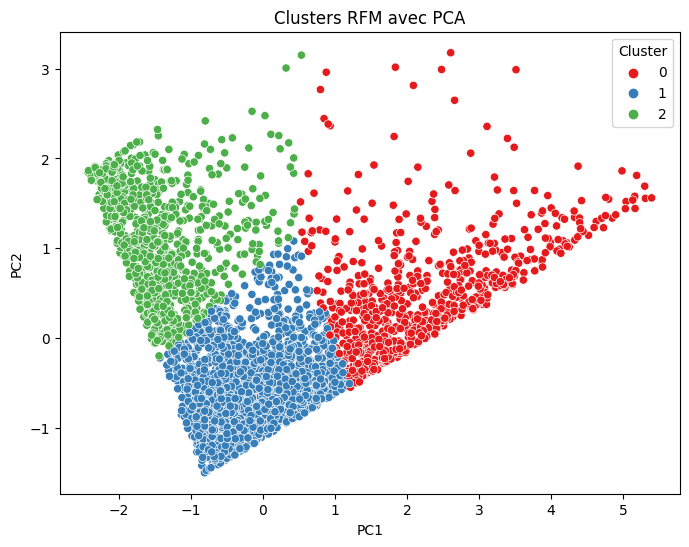

In [188]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Normaliser les données RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)

# Effectuer la segmentation initiale (fin 2010) avec K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(rfm_normalized)

# Ajouter les labels de cluster aux données RFM
rfm['Cluster'] = kmeans.labels_

# Appliquer l'ACP pour réduire les dimensions à 2
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_normalized)

# Créer un DataFrame avec les composantes principales et les labels de cluster
rfm_pca_df = pd.DataFrame(data=rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df['Cluster'] = kmeans.labels_

# Visualiser les clusters avec PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=rfm_pca_df, palette='Set1')
plt.title('Clusters RFM avec PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [189]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Liste pour stocker les valeurs d'inertie pour chaque nombre de clusters
# inertias = []

# # Boucle sur plusieurs nombres de clusters
# for k in range(1, 10):
#     # Créer un modèle KMeans avec k clusters
#     kmeans = KMeans(n_clusters=k, random_state=42)
    
#     # Ajuster le modèle aux données
#     kmeans.fit(rfm_normalized)
    
#     # Ajouter l'inertie du modèle à la liste
#     inertias.append(kmeans.inertia_)

# # Tracer l'inertie en fonction du nombre de clusters
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 10), inertias, 'o-')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('Inertie')
# plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
# plt.show()
# inertias

In [190]:
# Convertir la colonne InvoiceDate en objet Timestamp
df_2011['InvoiceDate'] = pd.to_datetime(df_2011['InvoiceDate'])

# Calculer la récence en fonction de la date de la dernière facture
max_date = df_2011['InvoiceDate'].max()
df_2011['Recency'] = (max_date - df_2011['InvoiceDate']).dt.days

# Calculer la fréquence en comptant le nombre de factures par client
df_frequency = df_2011.groupby('Customer_ID')['Invoice'].nunique().reset_index()
df_frequency = df_frequency.rename(columns={'Invoice': 'Frequency'})
df_2011 = df_2011.merge(df_frequency, on='Customer_ID')

# Calculer le montant monétaire total par client
df_monetary = df_2011.groupby('Customer_ID')['TotalSales'].sum().reset_index()
df_monetary = df_monetary.rename(columns={'TotalSales': 'MonetaryValue'})
df_2011 = df_2011.merge(df_monetary, on='Customer_ID')


/tmp/ipykernel_21393/930995589.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21393/930995589.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

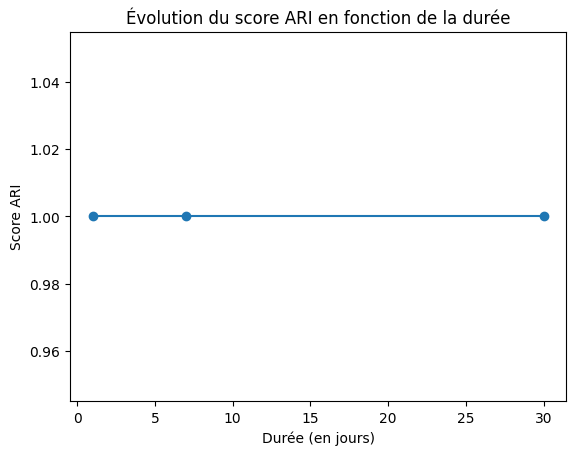

In [191]:
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# Convertir la colonne InvoiceDate en objet Timestamp
df_2011['InvoiceDate'] = pd.to_datetime(df_2011['InvoiceDate'])

# Effectuer la segmentation initiale (fin 2010)
kmeans_initial = KMeans(n_clusters=3, random_state=42)
kmeans_initial.fit(rfm_normalized)

# Prédire les clusters pour les données de 2010
predictions_initial = kmeans_initial.predict(rfm_normalized)

# Calculer le score ARI initial
ari_initial = adjusted_rand_score(rfm['Cluster'], predictions_initial)

# Liste pour stocker les scores ARI pour chaque durée
ari_scores = [ari_initial]

# Durées en jours
durations = [1, 7, 70]

# Boucle sur les durées
for duration in durations:
    # Sélectionner les données pour la durée spécifiée
    end_date = pd.to_datetime('2010-12-01') + timedelta(days=duration)
    df_duration = df_2011[df_2011['InvoiceDate'] <= end_date]
    
    # Effectuer la segmentation avec K-means
    kmeans_duration = KMeans(n_clusters=3, random_state=42)
    kmeans_duration.fit(rfm_normalized)
    
    # Prédire les clusters pour les nouvelles données
    predictions_duration = kmeans_duration.predict(rfm_normalized)
    
    # Calculer le score ARI pour la durée spécifiée
    ari_score = adjusted_rand_score(rfm['Cluster'], predictions_duration)
    
    # Ajouter le score ARI à la liste
    ari_scores.append(ari_score)

# Tronquer la liste des scores ARI pour qu'elle ait la même dimension que la liste des durées
ari_scores = ari_scores[:len(durations)]

# Tracer le lineplot de l'évolution du score ARI en fonction de la durée
plt.plot(durations, ari_scores, marker='o')
plt.xlabel('Durée (en jours)')
plt.ylabel('Score ARI')
plt.title('Évolution du score ARI en fonction de la durée')
plt.show()
